In [38]:
import pandas as pd
import numpy as np

import pickle as pk
import xgboost as xgb
import matplotlib.pyplot as plt

from scipy.stats import gaussian_kde

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

In [3]:
pd.set_option("display.max_rows", 8)

In [5]:
df = pd.read_pickle("../../data/df.pkl")
df

,desg,desi,desr,desz,Xaxis,desg_GP,desi_GP,desr_GP,desz_GP,wavelets,...,f14,f15,f16,f17,f18,f19,f20,type,type_bool,REDSHIFT_SPEC
ID,,,,,,,,,,,,,,,,,,,,,
SN10001,"[[0.0, 2.326, 4.792], [2.0, 4.617, 2.249], [9....","[[0.031000000002677552, 8.672, 5.439], [2.1560...","[[0.01600000000325963, 8.834, 5.339], [2.13999...","[[0.06199999999807915, 6.026, 4.693], [2.18699...","[0.0, 1.1313535353535435, 2.262707070707087, 3...","([0.0, 0.818888888888886, 1.637777777777772, 2...","([0.031000000002677552, 1.141676767679467, 2.2...","([0.01600000000325963, 1.076565656568908, 2.13...","([0.06199999999807915, 1.1927272727253795, 2.3...","[9.251771363349247, 8.972870155014132, 8.79160...",...,6.048710,-11.165995,23.954122,18.206973,6.125696,9.448978,-0.078004,II,False,0.59162
SN100023,"[[6.984000000004016, 5.679, 6.387], [7.9920000...","[[7.00800000000163, 4.698, 7.145], [8.02300000...","[[0.0, 16.04, 17.59], [6.992000000005646, 19.8...","[[4.121000000006461, 18.01, 3.601], [7.0230000...","[0.0, 1.3437474747475018, 2.6874949494950036, ...","([6.984000000004016, 8.256929292933277, 9.5298...","([7.00800000000163, 8.189737373738987, 9.37147...","([0.0, 0.8994242424242942, 1.7988484848485884,...","([4.121000000006461, 5.423121212127635, 6.7252...","[12.22728787505526, 11.357060718395505, 10.716...",...,33.710197,-11.581964,28.655932,19.743614,4.619543,37.266792,-16.596040,II,False,0.79264
SN10005,"[[10.027000000001863, 4.996, 8.081], [33.94500...","[[0.015000000006693881, 0.2977, 2.206], [18.94...","[[0.0, 1.033, 1.325], [13.015000000006694, 0.4...","[[0.03500000000349246, 1.826, 3.029], [48.875,...","[0.0, 1.0381919191919462, 2.0763838383838924, ...","([10.027000000001863, 10.782565656567513, 11.5...","([0.015000000006693881, 1.0530404040470573, 2....","([0.0, 1.0281717171717606, 2.056343434343521, ...","([0.03500000000349246, 1.0222929292964054, 2.0...","[2.000004411755352, 2.000003547336676, 2.00000...",...,-26.554909,15.768490,16.436792,17.114795,-20.292951,-24.222566,-11.295562,Ia,True,1.08327
SN10007,"[[0.0, 6.266, 10.48], [10.105999999999767, 17....","[[0.03200000000651926, 7.161, 9.313], [2.01600...","[[2.0, 1.24, 2.429], [10.121000000006461, 20.0...","[[0.9770000000062282, 0.6586, 5.329], [15.9930...","[0.0, 1.5136565656566285, 3.027313131313257, 4...","([0.0, 1.5132626262626456, 3.0265252525252913,...","([0.03200000000651926, 1.5451717171782005, 3.0...","([2.0, 3.49314141414145, 4.9862828282829, 6.47...","([0.9770000000062282, 2.480787878794107, 3.984...","[11.341091517194192, 8.812204685737349, 6.9798...",...,-99.877031,21.670852,24.155364,-26.622112,-27.616185,-19.981432,49.299250,Ia,True,0.82331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SN99899,"[[15.004000000000815, 1.352, 3.403], [53.87900...","[[0.0, 4.81, 2.212], [29.9059999999954, 0.0751...","[[7.019999999996799, 2.434, 1.445], [15.027999...","[[0.023999999997613486, 3.478, 3.05], [9.03499...","[0.0, 0.8468686868686516, 1.6937373737373032, ...","([15.004000000000815, 15.689212121212893, 16.3...","([0.0, 0.8468686868686516, 1.6937373737373032,...","([7.019999999996799, 7.785939393936206, 8.5518...","([0.023999999997613486, 0.8200808080784021, 1....","[20.712009726735538, 19.059663100848315, 17.84...",...,-20.467690,98.233177,-82.338152,40.618768,53.697825,-2.771304,-35.327613,II,False,0.65243
SN99921,"[[0.0, 8.327, 4.797], [2.0, 9.834, 2.261], [9....","[[0.031000000002677552, 22.78, 5.454], [2.1560...","[[0.01600000000325963, 26.73, 5.361], [2.13999...","[[0.06199999999807915, 15.19, 4.7], [2.1869999...","[0.0, 1.2923333333333222, 2.5846666666666445, ...","([0.0, 1.1299292929293416, 2.2598585858586833,...","([0.031000000002677552, 1.3230202020228414, 2....","([0.01600000000325963, 1.3080606060638358, 2.6...","([0.06199999999807915, 1.2726666666647435, 2.4...","[14.025137598441496, 16.23859348218353, 17.966...",...,30.582545,-38.454611,33.695746,32.105615,-3.304444,32.695392,-16.237457,II,False,0.69650
SN99946,"[[11.961000000002969, 1.5

In [6]:
df.REDSHIFT_SPEC.describe()

count    21291.000000
mean         0.669160
std          0.236500
min          0.023250
25%          0.486090
50%          0.667460
75%          0.859225
max          1.115250
Name: REDSHIFT_SPEC, dtype: float64

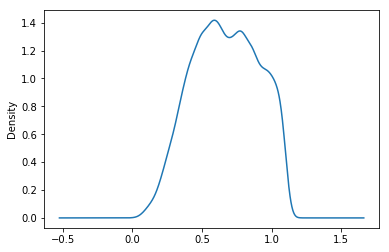

In [12]:
df.REDSHIFT_SPEC.plot.kde()

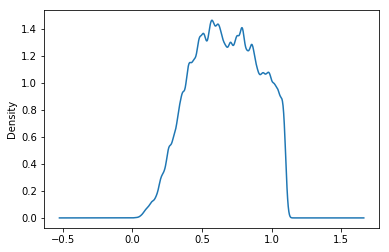

In [22]:
df.REDSHIFT_SPEC.plot.kde(bw_method=0.05)

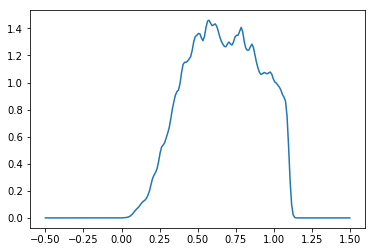

In [33]:
data = df.REDSHIFT_SPEC
density = gaussian_kde(data)
xs = np.linspace(-0.5,1.5,200)
density.covariance_factor = lambda : .05
density._compute_covariance()
plt.plot(xs,density(xs))
plt.show()

## Cross Validation

In [34]:
splits = int(len(df)/1100)

X_real = df.loc[:,'f1':'f20']
y_real = np.array(df.REDSHIFT_SPEC)

kf_real = KFold(n_splits = splits)
X_true_test = []
X_to_train = []
y_true_test = []
y_to_train = []
for train_index_real, test_index_real in kf_real.split(X_real):
    print("X_true_test:", train_index_real, "X_to_train:", test_index_real)
    X_true_test.append(X_real.iloc[train_index_real])
    X_to_train.append(X_real.iloc[test_index_real])
    y_true_test.append(y_real[train_index_real])
    y_to_train.append(y_real[test_index_real])

X_true_test: [ 1121  1122  1123 ... 21288 21289 21290] X_to_train: [   0    1    2 ... 1118 1119 1120]
X_true_test: [    0     1     2 ... 21288 21289 21290] X_to_train: [1121 1122 1123 ... 2239 2240 2241]
X_true_test: [    0     1     2 ... 21288 21289 21290] X_to_train: [2242 2243 2244 ... 3360 3361 3362]
X_true_test: [    0     1     2 ... 21288 21289 21290] X_to_train: [3363 3364 3365 ... 4481 4482 4483]
X_true_test: [    0     1     2 ... 21288 21289 21290] X_to_train: [4484 4485 4486 ... 5602 5603 5604]
X_true_test: [    0     1     2 ... 21288 21289 21290] X_to_train: [5605 5606 5607 ... 6723 6724 6725]
X_true_test: [    0     1     2 ... 21288 21289 21290] X_to_train: [6726 6727 6728 ... 7844 7845 7846]
X_true_test: [    0     1     2 ... 21288 21289 21290] X_to_train: [7847 7848 7849 ... 8965 8966 8967]
X_true_test: [    0     1     2 ... 21288 21289 21290] X_to_train: [ 8968  8969  8970 ... 10086 10087 10088]
X_true_test: [    0     1     2 ... 21288 21289 21290] X_to_train: 

## XGBoost linear regression

In [35]:
preds_arr = []
rmse_arr = []
matrices_arr = []
true_preds = []
true_rms = []
models = []

for i in range(len(X_true_test)):
    X_ = X_to_train[i]
    y_ = y_to_train[i]
    data_dmatrix = xgb.DMatrix(data=X_,label=y_)
    kf = KFold(n_splits = 5)
    X_train = []
    X_test = []
    y_train = []
    y_test = []
    
    for train_index, test_index in kf.split(X_):
        X_train.append(X_.iloc[train_index])
        X_test.append(X_.iloc[test_index])
        y_train.append(y_[train_index])
        y_test.append(y_[test_index])
    
    for j in range(len(X_train)):
        xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 5, alpha = 10, n_estimators = 10)
        xg_reg.fit(X_train[j],y_train[j])
        print("Fitting " + str(i) + str(j) + 'th model' )
        
        preds_arr.append(xg_reg.predict(X_test[j]))
        rmse_arr.append(np.sqrt(mean_squared_error(y_test[j], preds_arr[-1])))
        matrices_arr.append(np.round((abs(y_test[j]-preds_arr[-1])/y_test[j])*100))
        
        true_preds.append(xg_reg.predict(X_true_test[i]))
        true_rms.append(np.sqrt(mean_squared_error(y_true_test[i], true_preds[-1])))
        
        models.append(xg_reg)

[09:19:02] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[09:19:02] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
Fitting 00th model
[09:19:02] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[09:19:02] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
Fitting 01th model
[09:19:02] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[09:19:02] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
Fitting 02th model
[09:19:02] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[09:19:02] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squar

[09:19:03] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
Fitting 72th model
[09:19:03] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[09:19:03] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
Fitting 73th model
[09:19:03] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[09:19:03] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
Fitting 74th model
[09:19:03] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[09:19:03] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
Fitting 80th model
[09:19:03] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecated in

[09:19:04] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
Fitting 140th model
[09:19:04] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[09:19:04] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
Fitting 141th model
[09:19:04] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[09:19:04] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
Fitting 142th model
[09:19:04] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[09:19:04] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
Fitting 143th model
[09:19:04] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecate

In [36]:
print("True RMS:", len(true_rms))
true_rms

True RMS: 95


[0.2136745496616934,
 0.21597130351421076,
 0.21614026400260272,
 0.2152364627725477,
 0.21424743906185875,
 0.22051415563415566,
 0.22017739931224967,
 0.22066822307632747,
 0.2198179714796287,
 0.21957370669035153,
 0.2137027879130622,
 0.2162520851863452,
 0.21602915841354858,
 0.21525071604156915,
 0.21525827787754412,
 0.21583960170003108,
 0.2169856287594201,
 0.21668627526088716,
 0.21445782288187995,
 0.21467336899472378,
 0.21319020432993246,
 0.2137895187207646,
 0.21431511614621274,
 0.21427002465542733,
 0.21322158620902504,
 0.21761544997438267,
 0.2151116452178057,
 0.21608746154003292,
 0.21480917724439946,
 0.21760078024605692,
 0.2150791087518811,
 0.2137047361689124,
 0.21249359339462887,
 0.2111039792717373,
 0.21222012486592964,
 0.21389476709788066,
 0.21449050847260243,
 0.2150070799647227,
 0.21332024388419016,
 0.21406491714096562,
 0.2173493923894805,
 0.2181201550297365,
 0.2192403632218419,
 0.21794766626489925,
 0.2172989424047649,
 0.21702697892206121,
 0.2

In [37]:
models

[XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10, n_jobs=0, num_parallel_tree=1,
              objective='reg:linear', random_state=0, reg_alpha=10, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None),
 XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_

## Standard linear regression

In [ ]:
#TODO